# <font color = "green"> Image Manipulation and Annotation using OpenCV </font>



## Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

[[  0   0   0 ...   0 241 255]
 [  0   0   0 ...   0 241 255]
 [  0   0   0 ...   0 241 255]
 ...
 [  0   0   0 ...   0 241 255]
 [  0   0   0 ...   0 240 255]
 [  0   0   0 ...   0 221 255]]


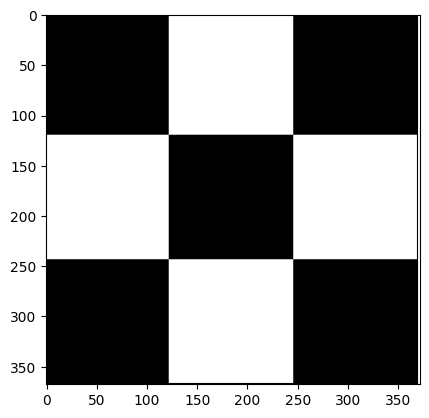

In [4]:
# Reading image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png", cv2.IMREAD_GRAYSCALE)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray");

In [5]:
# print the first pixel of the first black box
print(cb_img[0, 0])

0


In [6]:
# print the white pixel to the right of the first black box
print(cb_img[0, 6])

0


### Modifying Individual Pixel


[[  0   0   0 ...   0 241 255]
 [  0   0   0 ...   0 241 255]
 [  0   0  60 ...   0 241 255]
 ...
 [  0   0   0 ...   0 241 255]
 [  0   0   0 ...   0 240 255]
 [  0   0   0 ...   0 221 255]]


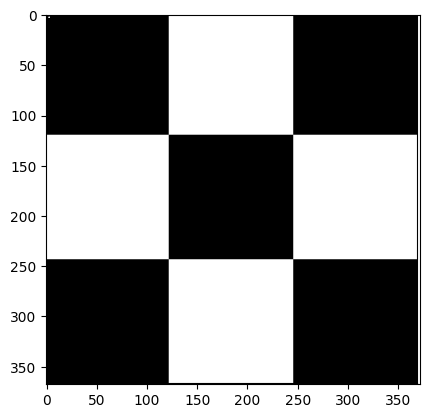

In [7]:
# copying the original image
cb_img_copy = cb_img.copy()

cb_img_copy[2, 2] = 60
cb_img_copy[2, 3] = 120
cb_img_copy[3, 2] = 180
cb_img_copy[3, 3] = 240

plt.imshow(cb_img_copy, cmap = "gray");
print(cb_img_copy)

<a id = "2."></a>
# 2. Cropping Images


Shape:  (767, 767, 3)


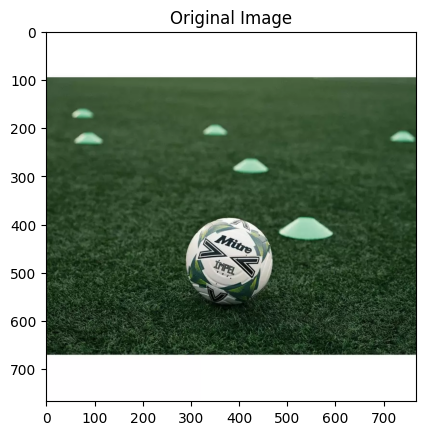

In [62]:
fb_img_bgr = cv2.imread("football.jpg", cv2.IMREAD_COLOR)

# Reversing the channels of the color image
fb_img_rgb = fb_img_bgr[:, :, ::-1]
print("Shape: ", fb_img_rgb.shape)
plt.title("Original Image")
plt.imshow(fb_img_rgb);

### Cropping the area containing a football



Given coordinates **(x, y, w, h)**:

**x, y**: Coordinates of the top-left corner of the crop rectangle.
<br>
**w, h**: Width and height of the crop rectangle.
<br>
<br>
The slicing operation `cropped_image = image[y:y+h, x:x+w]` extracts the part of the image:

**y:y+h**: Selects rows (vertical slice) from y to y+h.
<br>
**x:x+w**: Selects columns (horizontal slice) from x to x+w.
This results in a new array representing the cropped section of the image.

Shape:  (200, 200, 3)


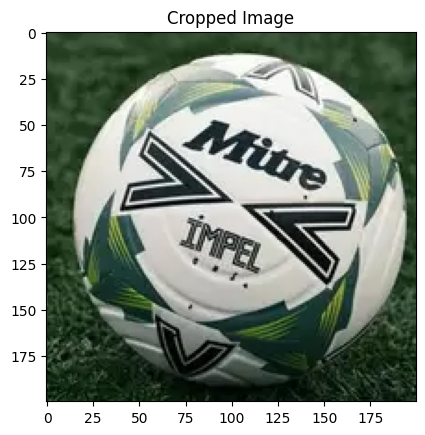

In [63]:
x, y, w, h = 275, 375, 200, 200
cropped_image = fb_img_rgb[y:y+h, x:x+w]
print("Shape: ", cropped_image.shape)
plt.title("Cropped Image")
plt.imshow(cropped_image);

<a id = "3."></a>
# 3. Resizing images


The function **`resize`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`,`dsize`,`fx`, and `fy`.

``` python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

`dst`: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has **2 required arguments**:
    
1. `src`:	input image

2. `dsize`: output image size

Optional arguments that are often used include:

1. `fx`: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

2. `fy`: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

### Method 1: Specifying the scaling factor using fx and fy

Shape:  (400, 400, 3)


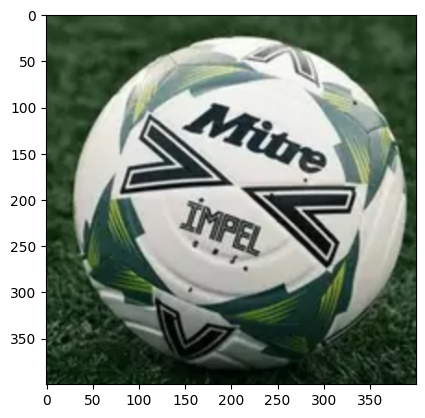

In [36]:
# fx = 2 and fy = 2 means double the width and height of the image respectively
# None means ignore the dsize parameter and instead use the scaling factors provided (fx and fy) to determine the new size
resized_cropped_image_2x = cv2.resize(cropped_image, None, fx = 2, fy = 2)
print("Shape: ", resized_cropped_image_2x.shape)
plt.imshow(resized_cropped_image_2x);

### Method 2: Specifying the exact size of the output image

Shape:  (200, 100, 3)


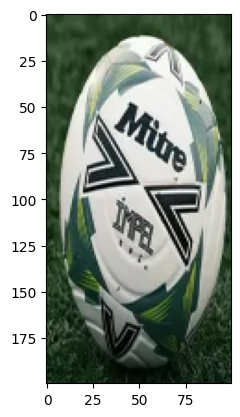

In [37]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

resized_cropped_image = cv2.resize(cropped_image, dsize = dim, interpolation = cv2.INTER_AREA) # INTER_AREA: Best for shrinking images, averages pixels within areas
print("Shape: ", resized_cropped_image.shape)
plt.imshow(resized_cropped_image);

### Maintaining aspect ratio

Shape:  (100, 100, 3)


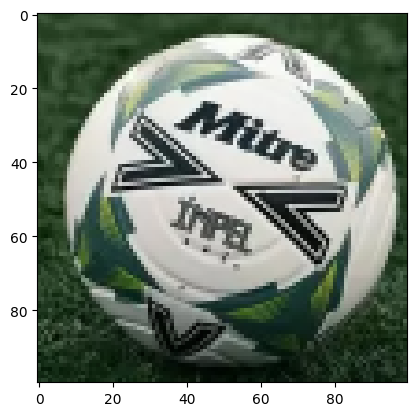

In [38]:
desired_width = 100
aspect_ratio = desired_width / cropped_image.shape[1]
desired_height = int(cropped_image.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

resized_cropped_image = cv2.resize(cropped_image, dsize = dim, interpolation = cv2.INTER_AREA)
print("Shape: ", resized_cropped_image.shape)
plt.imshow(resized_cropped_image);

### Displaying the cropped resized image

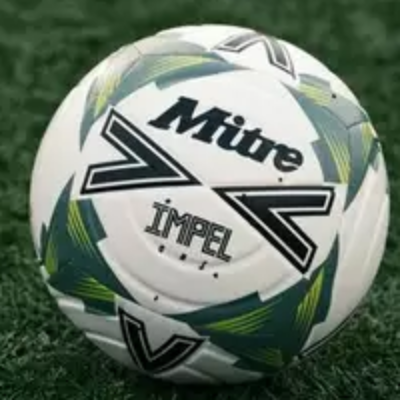

In [39]:
# Swap channel order
resized_cropped_image_2x = resized_cropped_image_2x[:, :, ::-1]

# Save resized image to disk
cv2.imwrite("resized_cropped_image_2x.png", resized_cropped_image_2x)

# Display the cropped and resized image
Image(filename="resized_cropped_image_2x.png")

<a id = "4."></a>
# 4. Flipping Images


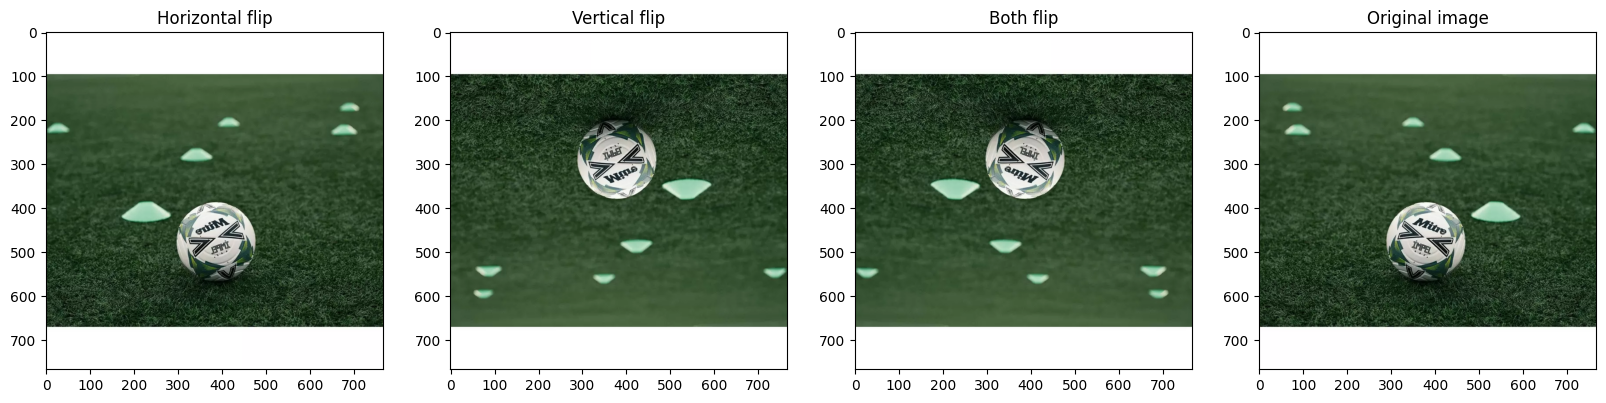

In [40]:
fb_img_rgb_flipped_horz = cv2.flip(fb_img_rgb, 1)
fb_img_rgb_flipped_vert = cv2.flip(fb_img_rgb, 0)
fb_img_rgb_flipped_both = cv2.flip(fb_img_rgb, -1)

plt.figure(figsize=[20, 5])

# Horizontal flip
plt.subplot(1, 4, 1)
plt.imshow(fb_img_rgb_flipped_horz)
plt.title("Horizontal flip")

# Vertical flip
plt.subplot(1, 4, 2)
plt.imshow(fb_img_rgb_flipped_vert)
plt.title("Vertical flip")

# Both flip
plt.subplot(1, 4, 3)
plt.imshow(fb_img_rgb_flipped_both)
plt.title("Both flip")

# Original image
plt.subplot(1, 4, 4)
plt.imshow(fb_img_rgb)
plt.title("Original image");

<a id = "5."></a>
# 5. Drawing Lines on Images


1. `img`:   Image on which we will draw a line

2. `pt1`:   First point(x,y location) of the line segment

3. `pt2`:   Second point of the line segment

4. `color`: Color of the line which will be drawn
    
Other optional arguments  include:

1. `thickness`: Integer specifying the line thickness. Default value is 1.

2. `lineType`:  Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.


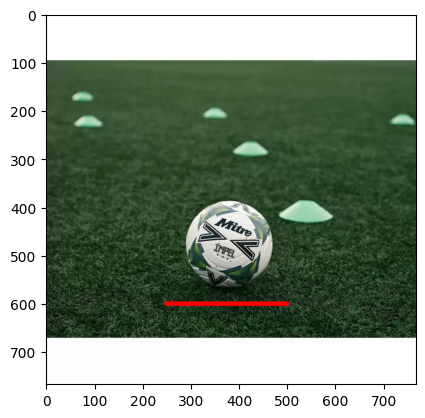

In [42]:
image_copy_line = fb_img_rgb.copy()

# The line starts from (500,420) and ends at (800,420)
# The color of the line is RED (Recall that we are using the image in RGB format) color = (RED, GREEN, BLUE)
# Thickness of line is 8px
# Linetype is cv2.LINE_AA

cv2.line(img = image_copy_line,
         pt1 = (250, 600),
         pt2 = (500, 600),
         color = (255, 0, 0),
         thickness=8,
         lineType=cv2.LINE_AA)

plt.imshow(image_copy_line);

<a id = "6."></a>
# 6. Drawing Circle on Images


We will explore the use of the `cv2.circle()` function in OpenCV.

``` python
img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:    Image on which we will draw a line

2. `center`: Center of the circle

3. `radius`: Radius of the circle

4. `color`:  Color of the circle which will be drawn
    
Next,  (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive). 
If a negative value is supplied for this argument, it will result in a filled circle.

2. `lineType`:  Type of the circle boundary. This is exact same as lineType argument in `cv2.line()`.

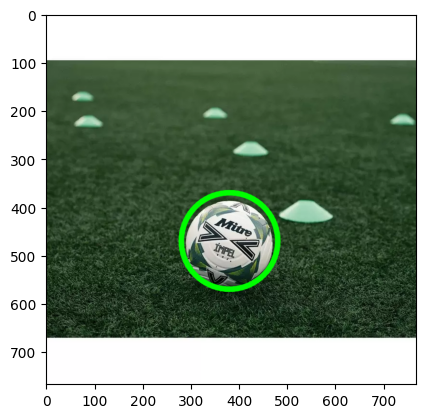

In [49]:
image_copy_circle = fb_img_rgb.copy()

cv2.circle(img = image_copy_circle,
           center = (380, 470),
           radius = 100,
           color = (0, 255, 0),
           thickness = 10,
           lineType = cv2.LINE_AA)

plt.imshow(image_copy_circle);

<a id = "7."></a>
# 7. Drawing Rectangle on Images



The function has **4 required arguments**:

1. `img`: Image on which the rectangle is to be drawn.

2. `pt1`: Vertex of the rectangle. Usually we use the **top-left vertex** here.

3. `pt2`: Vertex of the rectangle opposite to pt1. Usually we use the **bottom-right** vertex here.

4. `color`: Rectangle color
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive). If a negative value is supplied for this argument, it will result in a filled rectangle.

2. `lineType`: Type of the circle boundary. This is exact same as lineType argument in 
    `cv2.line()`

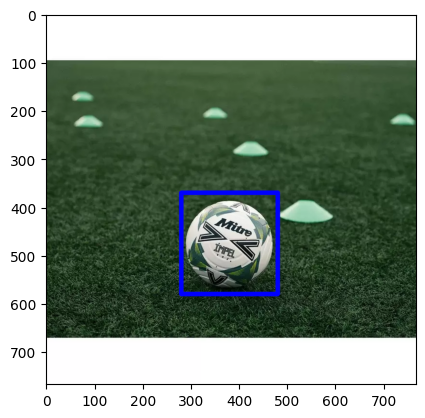

In [76]:
image_copy_rect = fb_img_rgb.copy()

cv2.rectangle(img = image_copy_rect,
              pt1 = (280, 370),
              pt2 = (480, 580),
              color = (0, 0, 255),
              thickness = 8,
              lineType = cv2.LINE_AA)

plt.imshow(image_copy_rect);

<a id = "8."></a>
# 8. Adding Text on Images


The function has **6 required arguments**:

1. `img`: Image on which the text has to be written.

2. `text`: Text string to be written.

3. `org`: Bottom-left corner of the text string in the image.

4. `fontFace`: Font type

5. `fontScale`: Font scale factor that is multiplied by the font-specific base size.

6. `color`: Font color
 
Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness for the text. Default value is 1.

2. `lineType`: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, `cv2.LINE_AA` (antialiased or smooth line) is used for the lineType.


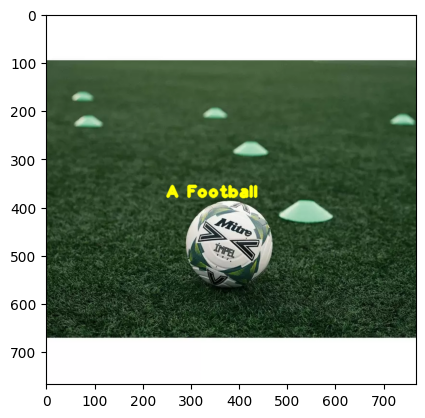

In [75]:
image_copy_text = fb_img_rgb.copy()

cv2.putText(img = image_copy_text,
            text = "A Football",
            org = (250, 380),
            fontFace = cv2.FONT_HERSHEY_PLAIN,
            fontScale = 2.3,
            color = (255, 255, 0),
            thickness = 5,
            lineType = cv2.LINE_AA)

plt.imshow(image_copy_text);